# Introduction
This colab worksheet provides a starting point for the computer vision assignment. 

# Data Loading

In [ ]:
# Download the data stored in a zipped numpy array from one of these two locations
# The uncommented one is likely to be faster. If you're running all your experiments
# on a machine at home rather than using colab, then make sure you save it 
# rather than repeatedly downloading it.

!wget "https://sussex.box.com/shared/static/zlccr7uwq97y9cuexlilftdpmgudaz7u.npz" -O training_images_full.npz
!wget "https://sussex.box.com/shared/static/axweldiirenlc4a6xn06l6heiuawodpa.npz" -O training_images_subset.npz

# The test images (without points)
!wget "https://sussex.box.com/shared/static/2ss21w2g8nd8fshhtu9r2ww2mm04xh9f.npz" -O test_images.npz

# The example images are here
!wget "https://sussex.box.com/shared/static/65pyy3pjnkl5yda7ra4rvhcd89l6i7fq.npzz" -O examples.npz



--2023-04-18 10:25:29--  https://sussex.box.com/shared/static/zlccr7uwq97y9cuexlilftdpmgudaz7u.npz
Resolving sussex.box.com (sussex.box.com)... 74.112.186.144
Connecting to sussex.box.com (sussex.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Cookie coming from sussex.box.com attempted to set domain to box.net
Location: /public/static/zlccr7uwq97y9cuexlilftdpmgudaz7u.npz [following]
--2023-04-18 10:25:29--  https://sussex.box.com/public/static/zlccr7uwq97y9cuexlilftdpmgudaz7u.npz
Reusing existing connection to sussex.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Cookie coming from sussex.box.com attempted to set domain to box.net
Location: https://sussex.app.box.com/public/static/zlccr7uwq97y9cuexlilftdpmgudaz7u.npz [following]
--2023-04-18 10:25:29--  https://sussex.app.box.com/public/static/zlccr7uwq97y9cuexlilftdpmgudaz7u.npz
Resolving sussex.app.box.com (sussex.app.box.com)... 74.112.186.144
Conn

# Check the data downloaded correctly
If any of these assertions fail, redownload the data

In [ ]:
def confirm_checksum(filename, true_checksum):
  import subprocess
  checksum = subprocess.check_output(['shasum',filename]).decode('utf-8')
  assert checksum.split(' ')[0] == true_checksum, 'Checksum does not match for ' + filename + ' redownload the data.'

confirm_checksum('training_images_full.npz', '69927c788396d4b8c05d33d1650b2aa66076c0f0')
confirm_checksum('training_images_subset.npz', '5e2690718c7b1a0d14db54f844e6e22453f5eb71')
confirm_checksum('test_images.npz', 'aed32f84664e906624c8af13b5462cbded13d539')
confirm_checksum('examples.npz', '2ea08d7b6d76b56de97325fe51daad72afaa3d73')

# Load the data

In [ ]:
import numpy as np


# Load the data using np.load
data = np.load('training_images_full.npz', allow_pickle=True)

# Extract the images
images = data['images']
# and the data points
pts = data['points']

print(images.shape, pts.shape)

# Load the data that only has a subset of annotations using np.load
data = np.load('training_images_subset.npz', allow_pickle=True)

# Extract the images
images_subset = data['images']
# and the data points
pts_subset = data['points']

print(images_subset.shape, pts_subset.shape)

test_data = np.load('test_images.npz', allow_pickle=True)
test_images = test_data['images']
print(test_images.shape)

example_data = np.load('examples.npz', allow_pickle=True)
example_images = example_data['images']
print(example_images.shape)

(1425, 256, 256, 3) (1425, 44, 2)
(1386, 256, 256, 3) (1386, 5, 2)
(554, 256, 256, 3)
(6, 256, 256, 3)


# Data Visualisation
Here's an example of how to display the images and their points

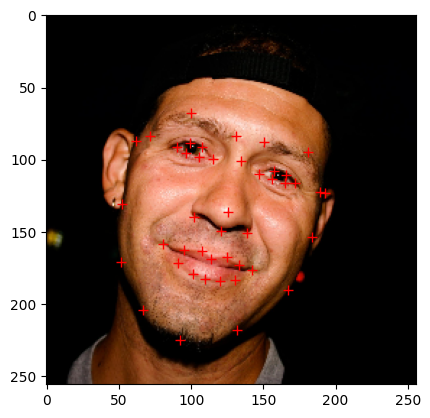

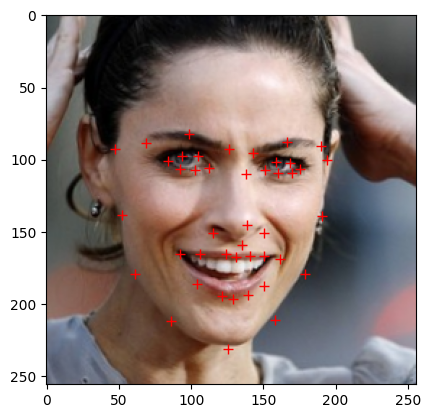

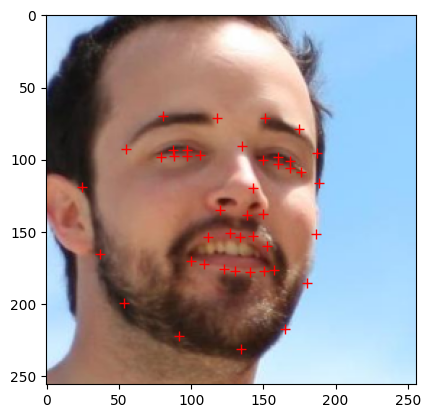

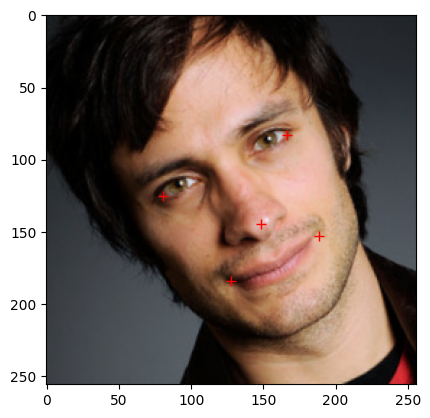

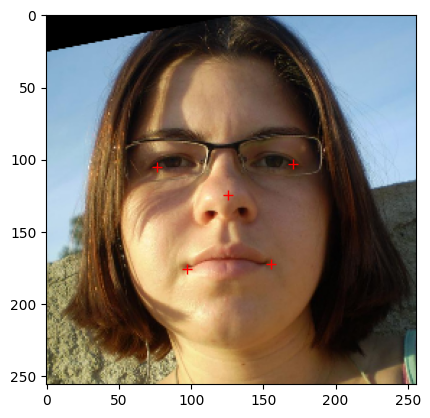

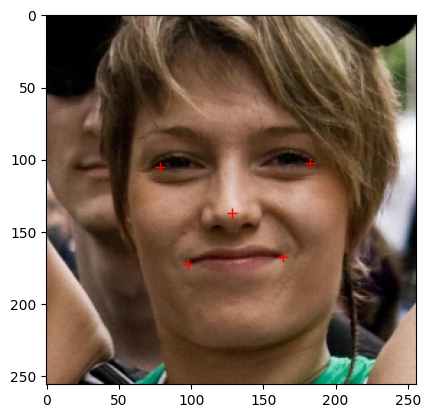

In [ ]:

def visualise_pts(img, pts):
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.plot(pts[:, 0], pts[:, 1], '+r', ms=7)
  plt.show()

for i in range(3):
  idx = np.random.randint(0, images.shape[0])
  visualise_pts(images[idx, ...], pts[idx, ...])

for i in range(3):
  idx = np.random.randint(0, images.shape[0])
  visualise_pts(images_subset[idx, ...], pts_subset[idx, ...])

# Extracting Subset of Points from Full Set. Calculating Prediction Error. and Exporting Results

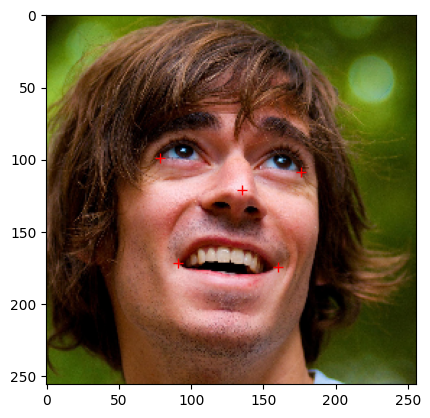

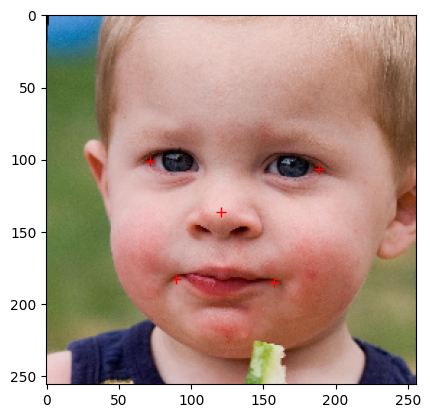

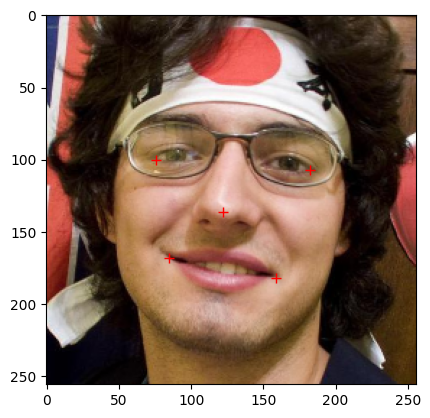

In [ ]:
def extract_subset_of_points(pts):
  indices = (20, 29, 16, 32, 38)
  if len(pts.shape) == 3:
    return pts[:, indices, :]
  elif len(pts.shape) == 2:
    return pts[indices, :]


for i in range(3):
  idx = np.random.randint(0, images.shape[0])
  visualise_pts(images[idx, ...], extract_subset_of_points(pts[idx, ...]))


In [ ]:
def euclid_dist(pred_pts, gt_pts):
  """
  Calculate the euclidean distance between pairs of points
  :param pred_pts: The predicted points
  :param gt_pts: The ground truth points
  :return: An array of shape (no_points,) containing the distance of each predicted point from the ground truth
  """
  import numpy as np
  pred_pts = np.reshape(pred_pts, (-1, 2))
  gt_pts = np.reshape(gt_pts, (-1, 2))
  return np.sqrt(np.sum(np.square(pred_pts - gt_pts), axis=-1))


In [ ]:
def save_as_csv(points, location = '.'):
    """
    Save the points out as a .csv file
    :param points: numpy array of shape (no_test_images, no_points, 2) to be saved
    :param location: Directory to save results.csv in. Default to current working directory
    """
    assert points.shape[0]==554, 'wrong number of image points, should be 554 test images'
    assert np.prod(points.shape[1:])==44*2, 'wrong number of points provided. There should be 34 points with 2 values (x,y) per point'
    np.savetxt(location + '/results.csv', np.reshape(points, (points.shape[0], -1)), delimiter=',')
